## Paso 1: Habilitar acceso IMAP en GMAIL y generar credenciales

El primer paso consiste en activar el acceso IMAP en Gmail(https://mail.google.com/mail/u/0/#settings/fwdandpop), lo cual nos posibilitará obtener todos los correos electrónicos. 
Para lograr esto, es necesario elegir la alternativa "Activar IMAP".

En segundo lugar, es importante crear una contraseña de aplicación o app password específica para Gmail (https://myaccount.google.com/apppasswords/).

In [63]:
import imaplib
import email
import yaml

import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from email.header import decode_header

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap
import plotly as plt


## Paso 2: Accediendo a los correos de Gmail a través de las credenciales.

In [2]:
with open('Resources/credenciales.yaml') as f:
    content = f.read()
my_credentials = yaml.load(content, Loader = yaml.FullLoader)
user, password = my_credentials['user'], my_credentials['password']

imap_url ='imap.gmail.com'
my_mail = imaplib.IMAP4_SSL(imap_url)
my_mail.login(user, password)

('OK', [b'ocontreras@unitru.edu.pe authenticated (Success)'])

In [3]:
# Seleccionar todos los correos de la bandeja de entrada
my_mail.select('Inbox')

('OK', [b'2188'])

In [4]:
#Obtener la cantidad de correos que existe en mi Gmail
total_correos = int(my_mail.select('Inbox')[1][0].decode('utf-8'))
total_correos

2188

## Paso 3: Obtención de los correos de Gmail

In [5]:
email_df = pd.DataFrame(columns=['Date','From','Subject'], index=range(total_correos,0,-1))

for i in tqdm(range(total_correos, 0, -1)):
    data = my_mail.fetch(str(i),'(UID RFC822)')
    for response_part in data:
        arr = response_part[0]
        if isinstance(arr, tuple):
            try: msg = email.message_from_string(str(arr[1],'utf-8'))
            except: msg = email.message_from_string(str(arr[1],'latin-1'))
            new_row = pd.Series({"Date":msg['Date'] , "From":msg['from'], "Subject":msg['subject']})
    email_df = email_df.append(new_row, ignore_index=True)
    
email_df = email_df.dropna(how='all').reset_index(drop=True) # Limpiar filas vacías
email_df

100%|██████████| 2188/2188 [17:13<00:00,  2.12it/s]


,Date,From,Subject
0,"Sun, 13 Aug 2023 01:02:34 GMT",Google <no-reply@accounts.google.com>,Alerta de seguridad
1,"Sun, 13 Aug 2023 01:00:55 GMT",Google <no-reply@accounts.google.com>,=?UTF-8?Q?Se_ha_activado_la_verificaci=C3=B3n_...
2,"Sun, 13 Aug 2023 01:00:50 GMT",Google <no-reply@accounts.google.com>,Alerta de seguridad
3,"Sat, 12 Aug 2023 00:09:08 +0000 (UTC)",LinkedIn <updates-noreply@linkedin.com>,=?UTF-8?Q?OSCE_-_Organismo_Supervisor_de_las_C...
4,"Sat, 12 Aug 2023 06:03:35 +0000",Balsamiq Cloud <sales@balsamiq.com>,Your Balsamiq Cloud trial has expired
...,...,...,...
2183,"Tue, 16 Jun 2020 13:07:48 +0000",=?UTF-8?Q?Juan_Orlando_Salazar_C=2E=2E=2E_=28v...,=?UTF-8?Q?Material_Estudiantes_=2D_Invitaci=C3...
2184,"Tue, 16 Jun 2020 13:07:03 +0000",=?UTF-8?Q?Juan_Orlando_Salazar_C=2E=2E=2E_=28v...,=?UTF-8?Q?Material_Estudiantes_=2D_Invitaci=C3...
2185,"Tue, 16 Jun 2020 07:49:05 -0500",=?UTF-8?Q?Julio_C=2E_Peralta_Casta=C3=B1eda?= ...,Correo institucional
2186,"Tue, 16 Jun 2020 05:49:49 -0700",Equipo de Gmail <mail-noreply@google.com>,Consejos para utilizar tu nueva bandeja de ent...


Guardamos en un documentos CSV todos los correos obtenidos

In [6]:
email_df.to_csv('Data/email_df.csv', index=False, encoding='utf-8')

Leemos y visualizamos el documento CSV 

In [2]:
email_df = pd.read_csv('Data/email_df.csv').fillna('')
email_df.head(20)

,Date,From,Subject
0,"Sun, 13 Aug 2023 01:02:34 GMT",Google <no-reply@accounts.google.com>,Alerta de seguridad
1,"Sun, 13 Aug 2023 01:00:55 GMT",Google <no-reply@accounts.google.com>,=?UTF-8?Q?Se_ha_activado_la_verificaci=C3=B3n_...
2,"Sun, 13 Aug 2023 01:00:50 GMT",Google <no-reply@accounts.google.com>,Alerta de seguridad
3,"Sat, 12 Aug 2023 00:09:08 +0000 (UTC)",LinkedIn <updates-noreply@linkedin.com>,=?UTF-8?Q?OSCE_-_Organismo_Supervisor_de_las_C...
4,"Sat, 12 Aug 2023 06:03:35 +0000",Balsamiq Cloud <sales@balsamiq.com>,Your Balsamiq Cloud trial has expired
5,"Sat, 12 Aug 2023 05:54:05 +0000 (UTC)",LinkedIn Learning <messages-noreply@linkedin.com>,=?UTF-8?Q?=C2=A1Felicidades_por_completar?=\r\...
6,"Sat, 12 Aug 2023 05:53:42 +0000 (UTC)",LinkedIn Learning <messages-noreply@linkedin.com>,=?UTF-8?Q?=C2=A1Felicidades_por_completar?=\r\...
7,"Sat, 12 Aug 2023 05:53:42 +0000 (UTC)",LinkedIn Learning <messages-noreply@linkedin.com>,=?UTF-8?Q?=C2=A1Felicidades_por_completar?=\r\...
8,"Sat, 12 Aug 2023 02:45:42 +0000 (UTC)",Alertas de empleo de LinkedIn <jobalerts-norep...,=?UTF-8?Q?=C2=ABIngeniero_de_software=C2=BB:_W...
9,"Sat, 12 Aug 2023 00:06:30 +0000 (UTC)",LinkedIn <messages-noreply@linkedin.com>,"=?UTF-8?Q?=F0=9F=92=AC_Oscar_Eduardo,_a=C3=B1a..."


In [8]:
#print(msg.keys())

['MIME-Version', 'x-no-auto-attachment', 'Received', 'Date', 'Message-ID', 'Subject', 'From', 'To', 'Content-Type']


## Paso 4: Limpieza de los Datos

In [3]:
def obtener_correo_de_from(x):
    x_mod = x.split('<')[-1].split('>')[0]
    return x_mod

In [4]:
def obtener_nombre_de_from(x):
    text, encoding = decode_header(x)[0]
    if not encoding and isinstance(text, str):
        text = ' '.join(text.split(' ')[:-1])
    else:
        text = text.decode('utf-8', errors='ignore')
        
    text = text.replace('"', '')
    return text

In [5]:
def limpiar_subject(x):
    if x:
        text, encoding = decode_header(x)[0]
        try:
            text = text.decode('utf-8', errors='ignore')
        except:
            pass
    else: text=x
    return text

In [6]:
email_df['Mail'] = email_df['From'].apply(lambda x: obtener_correo_de_from(x))
email_df['Name'] = email_df['From'].apply(lambda x: obtener_nombre_de_from(x))
email_df['Subject'] = email_df['Subject'].apply(lambda x: limpiar_subject(x))
email_df = email_df.drop(columns=['From'])
email_df.head()

,Date,Subject,Mail,Name
0,"Sun, 13 Aug 2023 01:02:34 GMT",Alerta de seguridad,no-reply@accounts.google.com,Google
1,"Sun, 13 Aug 2023 01:00:55 GMT",Se ha activado la verificación en dos pasos,no-reply@accounts.google.com,Google
2,"Sun, 13 Aug 2023 01:00:50 GMT",Alerta de seguridad,no-reply@accounts.google.com,Google
3,"Sat, 12 Aug 2023 00:09:08 +0000 (UTC)",OSCE - Organismo Supervisor de las Contratacio...,updates-noreply@linkedin.com,LinkedIn
4,"Sat, 12 Aug 2023 06:03:35 +0000",Your Balsamiq Cloud trial has expired,sales@balsamiq.com,Balsamiq Cloud


## Paso 5: Manipulación de los Datos

In [7]:
def limpiar_fecha(x):
    if ',' not in x: x = ', ' + x
    if '(' in x: x = ' '.join(x.split(' ')[:-1])
    x = ' '.join(x.split(' ')[:-1])
    return x

In [8]:
def obtener_dia(x):
    x = x.strftime('%A')
    return x

In [9]:
### Transformar Date "Wed, 14 Sep 2022 17:38:23 +0000 (UTC)" 
# Obtener columna 'H_M_S'
email_df['Date'] = email_df['Date'].apply(lambda x: limpiar_fecha(x)) # Se obtiene "Wed, 14 Sep 2022 17:38:23"
email_df['Date'] = email_df['Date'].str.split(', ').str[-1]           # Se obtiene "14 Sep 2022 17:38:23"
email_df['H_M_S'] = email_df['Date'].apply(lambda x: x[-8:])          # Se obtiene "17:38:23"

# Obtener columna 'Hour'
email_df['Hour'] = email_df['H_M_S'].apply(lambda x: x[:2]+'h-'+str(int(x[:2])+1).zfill(2)+'h')    # Se obtiene "17h-18h"

# Obtener columna 'Date'
email_df['Date'] = email_df['Date'].apply(lambda x: x[:-9] if len(x[:-9])==11 else '0'+x[:-9] )    # Se obtiene "14 Sep 2022"
email_df['Date'] = pd.to_datetime(email_df['Date'], format='%d %b %Y')                             # Se obtiene "2022-09-14"

# Obtener columna 'WeekDay'
email_df['WeekDay'] = email_df['Date'].apply(lambda x: obtener_dia(x))                             # Se obtiene "Wednesday"

email_df.head()

,Date,Subject,Mail,Name,H_M_S,Hour,WeekDay
0,2023-08-13,Alerta de seguridad,no-reply@accounts.google.com,Google,01:02:34,01h-02h,Sunday
1,2023-08-13,Se ha activado la verificación en dos pasos,no-reply@accounts.google.com,Google,01:00:55,01h-02h,Sunday
2,2023-08-13,Alerta de seguridad,no-reply@accounts.google.com,Google,01:00:50,01h-02h,Sunday
3,2023-08-12,OSCE - Organismo Supervisor de las Contratacio...,updates-noreply@linkedin.com,LinkedIn,00:09:08,00h-01h,Saturday
4,2023-08-12,Your Balsamiq Cloud trial has expired,sales@balsamiq.com,Balsamiq Cloud,06:03:35,06h-07h,Saturday


In [10]:
email_df.to_csv('Data/email_df_final.csv', quotechar='"', sep='|', index=False, encoding='utf-8')

## Paso 6: Plotear los asuntos de los correos con WordCloud

In [11]:
# Escalar de 0 a 1 los valores RGB
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

# Asignar colores del logo de Gmail
# guinda (197,34,31), verde (52,168,83), azul (66,133,244), rojo (234,67,53), amarillo (251,188,4)
cdict = {'red':((0.0,inter_from_256(197),inter_from_256(197)),
               (1/5*1,inter_from_256(52),inter_from_256(52)),
               (1/5*3,inter_from_256(66),inter_from_256(66)),
               (1/5*4,inter_from_256(234),inter_from_256(234)),
               (1.0,inter_from_256(251),inter_from_256(251))),
        'green':((0.0, inter_from_256(34), inter_from_256(34)),
               (1/5*1, inter_from_256(168), inter_from_256(168)),
               (1/5*3, inter_from_256(133), inter_from_256(133)),
               (1/5*4, inter_from_256(67), inter_from_256(67)),
               (1.0, inter_from_256(188), inter_from_256(188))),
        'blue':((0.0, inter_from_256(31), inter_from_256(31)),
               (1/5*1, inter_from_256(83), inter_from_256(83)),
               (1/5*3, inter_from_256(244), inter_from_256(244)),
               (1/5*4, inter_from_256(53), inter_from_256(53)),
               (1.0, inter_from_256(4), inter_from_256(4))),}

# Crear paleta customizada de colores
gmail = LinearSegmentedColormap('gmail',segmentdata=cdict)

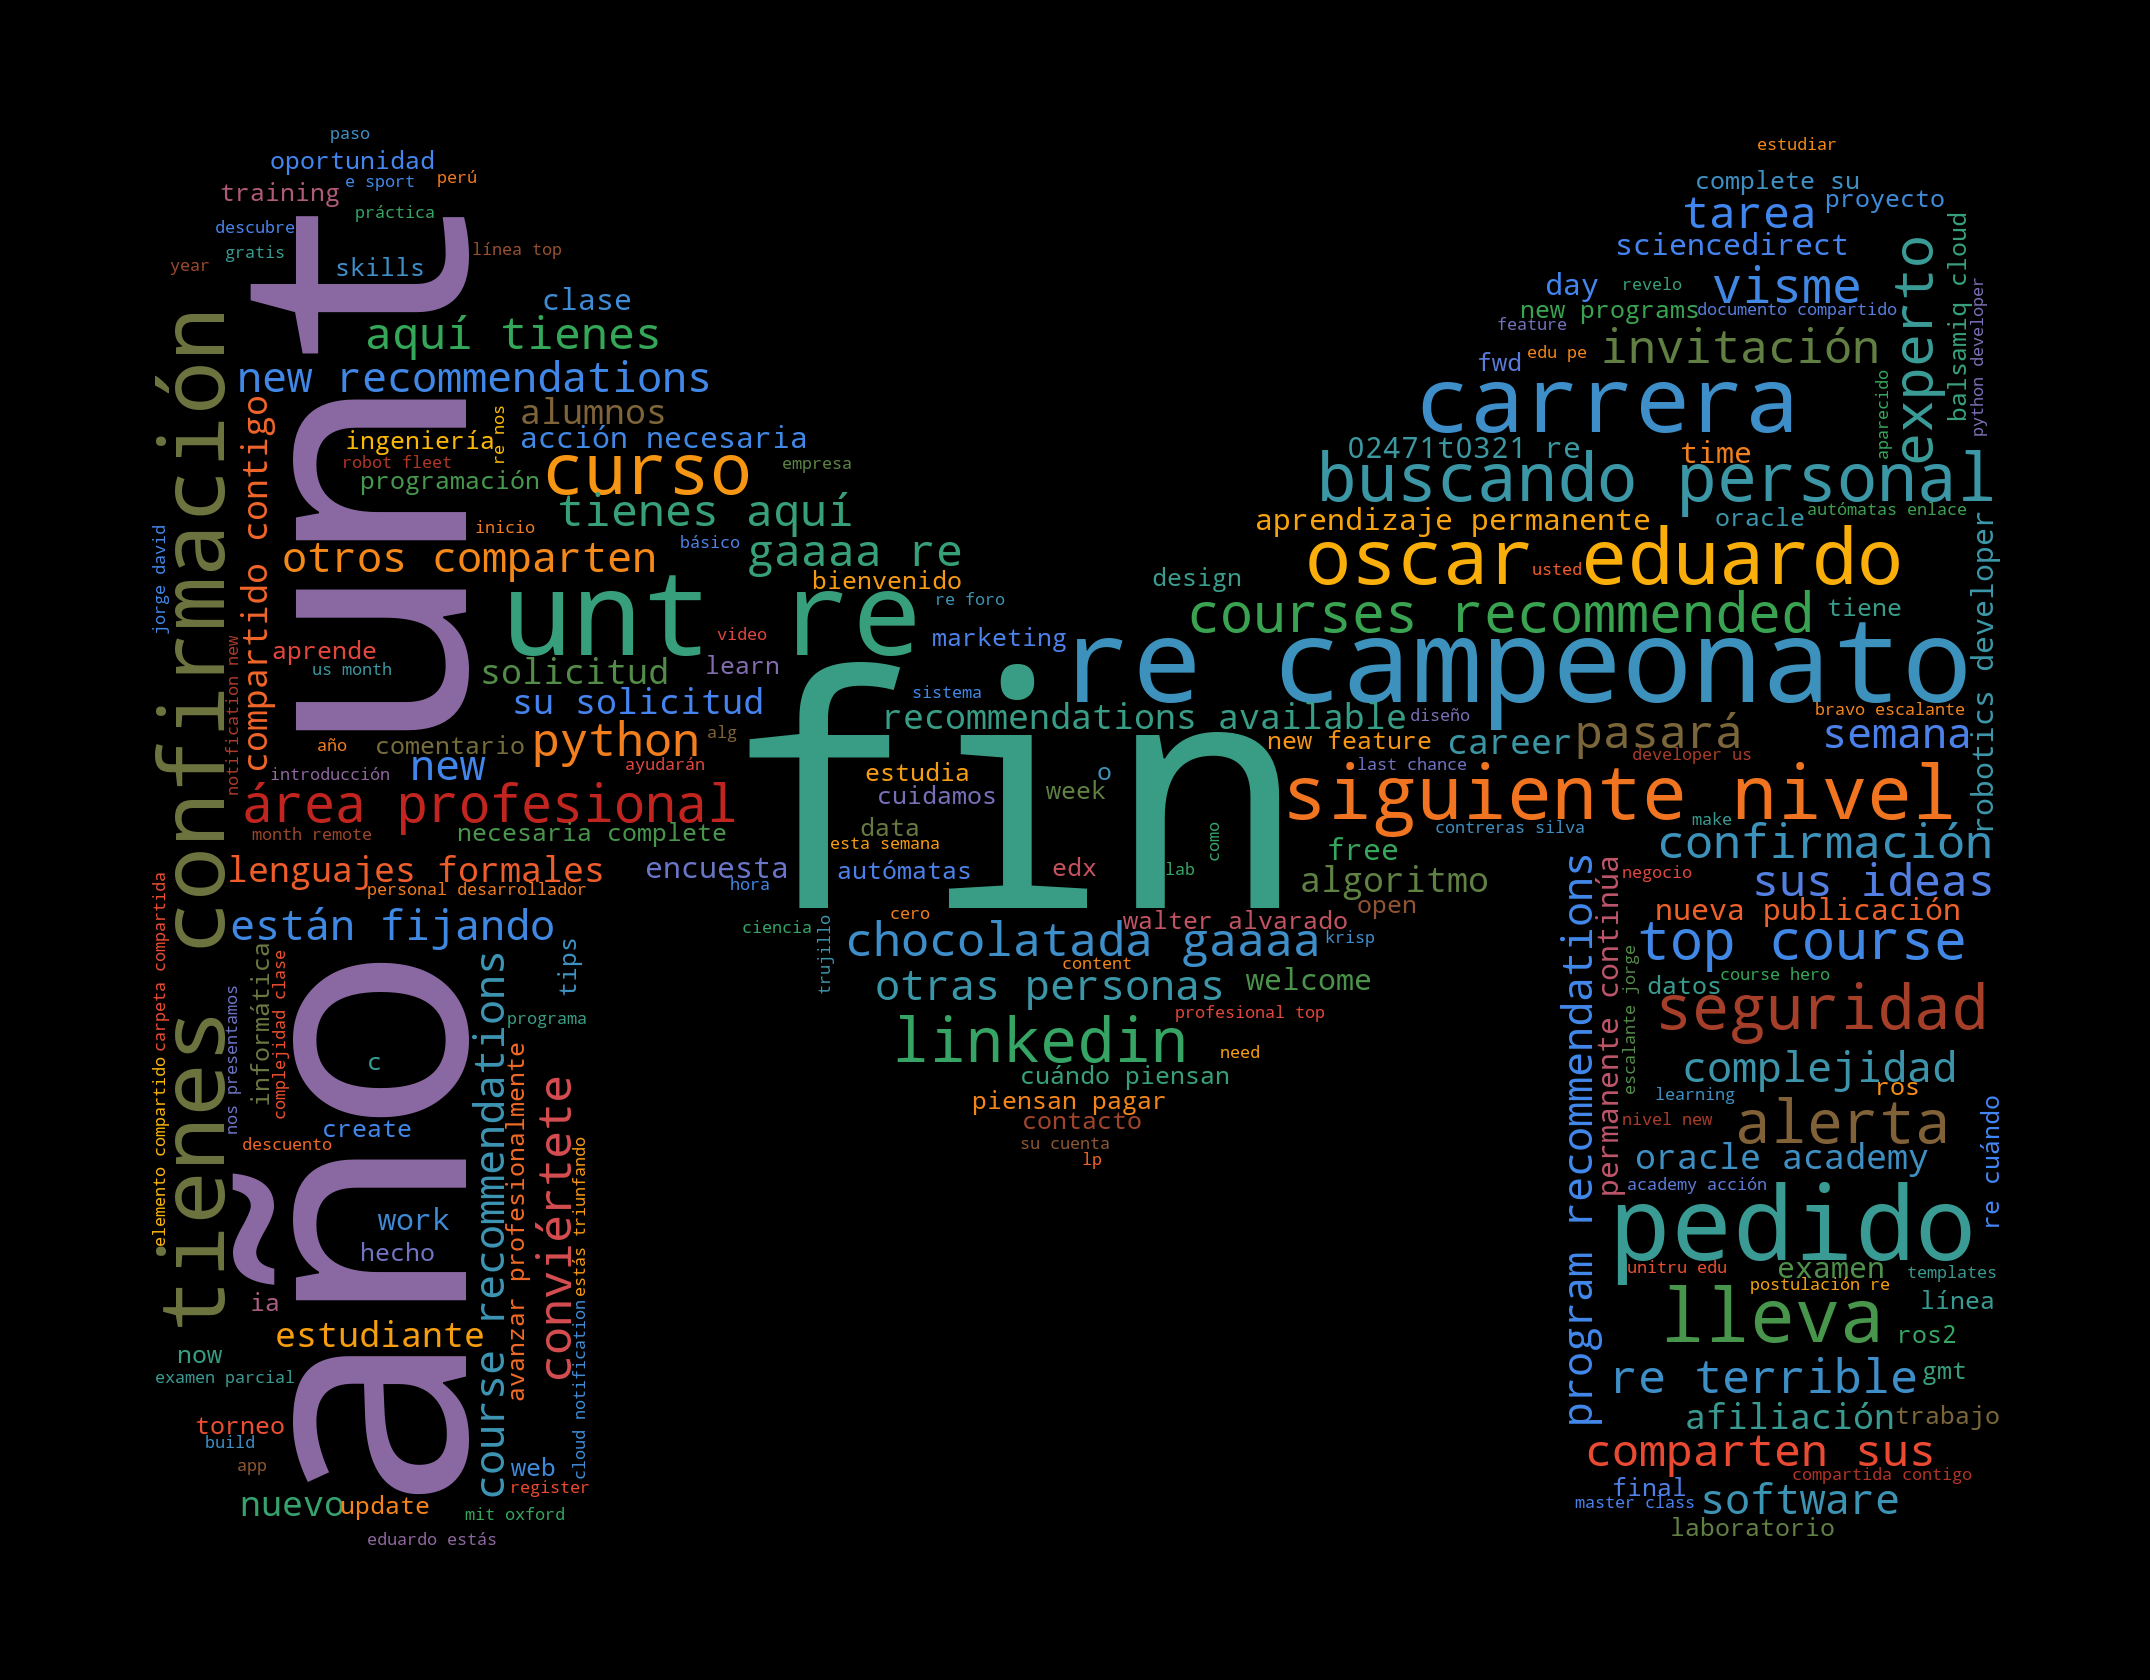

In [19]:
# Crear un string que contendrá todas las palabras
total_subjects = ' '
stopwords = STOPWORDS.update(['al','de','en','tu','s','la','y','que','te','lo','el','la','solo','del','por','qué','que','ha','desde',
                             'por','ya','más','es','con','tus','para','se','los','un','una','las','esto','va','sobre','ti','los',
                             'sandro','agama','está','tienes notificaciones','este','día','hola','hoy'])
mask = np.array(Image.open('Resources/gmail.jpg'))

# Obtener y acumular todas los subjects de los correos
for mensaje in email_df['Subject'].values:
    subjects = str(mensaje).lower().split() # Obtener las palabras en minúscula de cada subject
    for subject in subjects:
        total_subjects = total_subjects + subject + ' ' # Acumular todas los subjects

wordcloud = WordCloud(scale=2.5, width = 1000, height = 800, 
                      background_color ='black',
                      mask = mask,
                      colormap=gmail,
                      stopwords = stopwords, 
                      min_font_size = 6).generate(total_subjects) 

# Plotear la nube de palabras más usadas
wordcloud.to_image()

## Paso 7: Plotear los Datos con respecto a año, mes y los top senders de la bandeja de correos, con Plotly

In [64]:
df=email_df
# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año de la columna 'Date'
df['Year'] = df['Date'].dt.year

# Crear una nueva columna 'Month' que contenga el mes de cada registro
df['Month'] = df['Date'].dt.month

df.head()

,Date,Subject,Mail,Name,H_M_S,Hour,WeekDay,Year,Month
0,2023-08-13,Alerta de seguridad,no-reply@accounts.google.com,Google,01:02:34,01h-02h,Sunday,2023,8
1,2023-08-13,Se ha activado la verificación en dos pasos,no-reply@accounts.google.com,Google,01:00:55,01h-02h,Sunday,2023,8
2,2023-08-13,Alerta de seguridad,no-reply@accounts.google.com,Google,01:00:50,01h-02h,Sunday,2023,8
3,2023-08-12,OSCE - Organismo Supervisor de las Contratacio...,updates-noreply@linkedin.com,LinkedIn,00:09:08,00h-01h,Saturday,2023,8
4,2023-08-12,Your Balsamiq Cloud trial has expired,sales@balsamiq.com,Balsamiq Cloud,06:03:35,06h-07h,Saturday,2023,8


In [65]:
# Contar los registros de correo electrónico por año
email_counts = df.groupby('Year')['Mail'].count().reset_index()

# Generar la gráfica
fig = px.bar(email_counts, x='Year', y='Mail', labels={'Year': 'Año', 'Mail': 'Cantidad de Correos'},
             title='Registros de Correo Electrónico por Año')

# Mostrar la gráfica
fig.show()

In [66]:
# Contar la cantidad de registros por mes y año
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Mapear el número del mes al nombre del mes
monthly_counts['Month'] = monthly_counts['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Crear la gráfica usando Plotly Express
fig = px.bar(monthly_counts, x='Month', y='Count', animation_frame='Year',
             title='Cantidad de Emails por Mes y Año')
fig.show()

In [67]:
# Obtener los top 10 nombres con más registros
top_names = df['Name'].value_counts().head(10)

# Crear un DataFrame con los top 10 nombres y sus respectivos conteos
top_names_df = pd.DataFrame({'Name': top_names.index, 'Count': top_names.values})

# Crear la gráfica de pastel usando Plotly Express
fig = px.pie(top_names_df, names='Name', values='Count', title='Top 10 Senders')
fig.show()